# Use ChatGPT prompts and OpenAI REST Services

Before you can run this example, ensure you have an OpenAI service in Azure and a model deployment. If you need help, follow the quickstart guide here: [Quickstart: Get started using GPT-35-Turbo and GPT-4 with Azure OpenAI Service](https://learn.microsoft.com/azure/ai-services/openai/chatgpt-quickstart?tabs=command-line&pivots=programming-language-studio)

The following samples assume that there is an OpenAI service deployed at `https://skynetbeta.openai.azure.com/` and a gpt-35-turbo deployment named `chattykathy`. To have the samples working in your environment, make sure adjust URL and deployment name so that they will match your account.


## Send a question to the OpenAI REST Endpoint

In this first example, we will send a question to the OpenAI REST endpoint and get a response. The question we will send via a REST call is "Why is the sky blue". The call to the stored proceduere will pass api-key in the header for authentication. This key can be found under Keys and Endpoint
on the OpenAI service page.

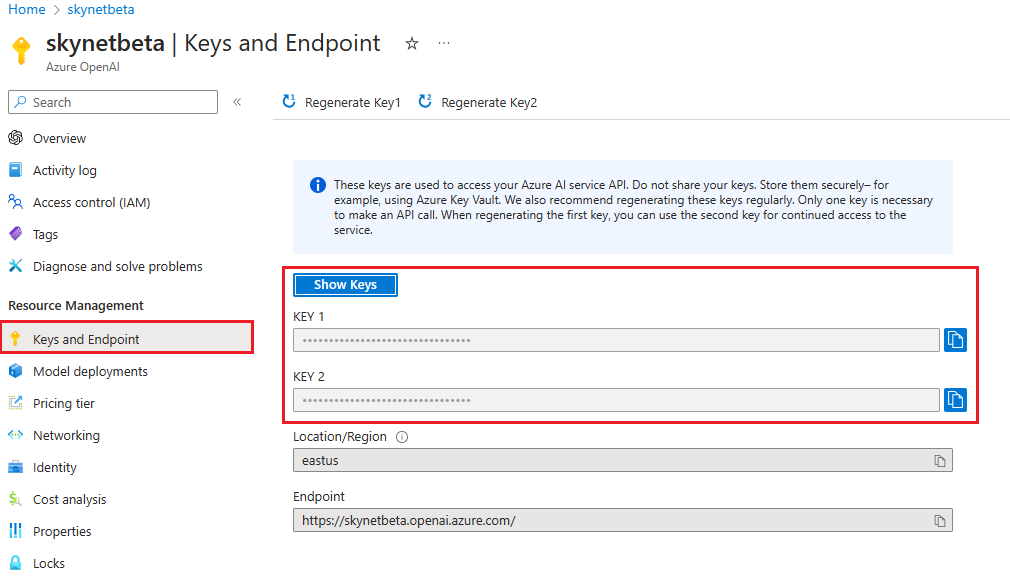

To find the URL of the REST service, you can use Azure AI Studio's Chat Playground. Click the View Code button

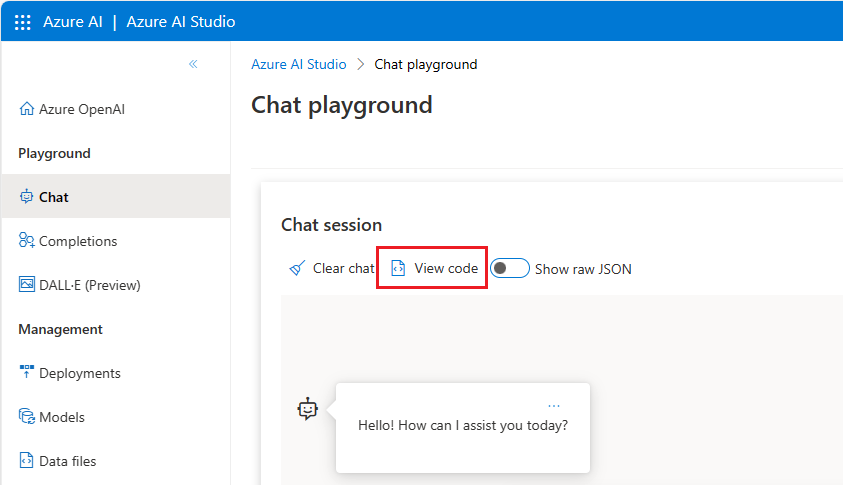

And copy the Endpoint URL. You can also copy the key here as well.

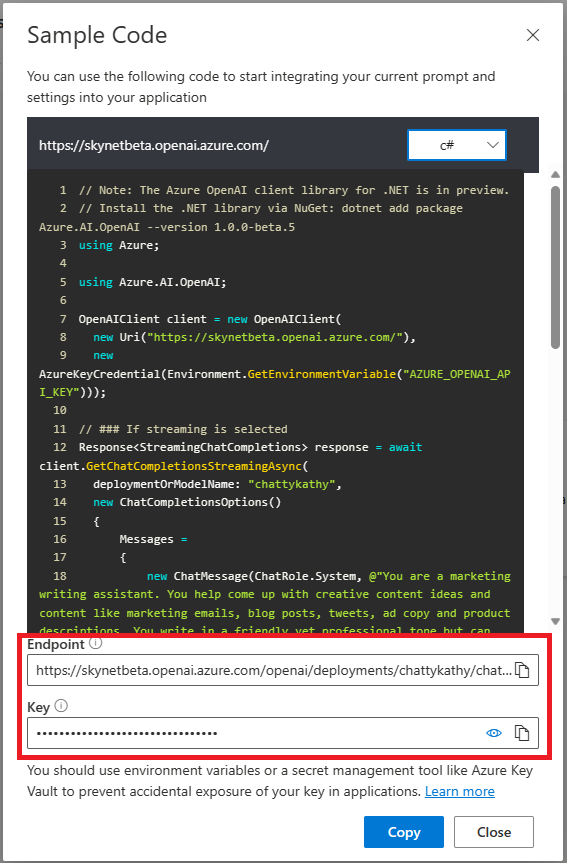

The call to External REST Endpoint Invocation via the Azure SQL Database will be as follows:

*(As a reminder, ensure you replace the URL and the api-key with the ones from your account)*

In [ ]:
declare @url nvarchar(4000) = N'https://skynetbeta.openai.azure.com/openai/deployments/chattykathy/chat/completions?api-version=2023-07-01-preview';
declare @headers nvarchar(102) = N'{"api-key":"1001001sos1001001in-distress"}'
declare @payload nvarchar(max) = N'{"messages":[[{"role":"system","content":"You are an AI assistant that helps people find information."},
                                   {"role":"system","content":"Why is the sky blue?"}]}'
declare @ret int, @response nvarchar(max);
exec @ret = sp_invoke_external_rest_endpoint
    @url = @url,
    @method = 'POST',
    @headers = @headers,
    @payload = @payload,
    @timeout = 230,
    @response = @response output;
select @ret as ReturnCode, @response as Response;

With the response JSON containing an answer being similar to the following:

In [ ]:
"choices": [
    {
        "index": 0,
        "finish_reason": "stop",
        "message": {
            "role": "assistant",
            "content": "The sky appears blue because when the sun's light enters Earth's atmosphere,
                              it is scattered by the gases and particles in the air. This scattering causes the shorter
                              blue wavelengths of light to be dispersed more than the other colors in the spectrum.
                              This is known as Rayleigh scattering. As a result, when we look up at the sky during
                              the day, we see it as blue."
        },
        "content_filter_results": {
            "hate": {
                "filtered": false,
                "severity": "safe"
            },
            "self_harm": {
                "filtered": false,
                "severity": "safe"
            },
            "sexual": {
                "filtered": false,
                "severity": "safe"
            },
            "violence": {
                "filtered": false,
                "severity": "safe"
            }
        }
    }
],

If you have the adventureworks demo data in your database, you can use date from the Products table and send in the prompt to ChatGPT. The following example will ask OpenAI to create add copy based on a product and product description:

*(As a reminder, ensure you replace the URL and the api-key with the ones from your account)*

In [ ]:
declare @adcopy VARCHAR(500);

set @adcopy =
(SELECT Name  + ': ' + Description
FROM SalesLT.vProductAndDescription
WHERE ProductID = 980 and Culture = 'en');

declare @url nvarchar(4000) = N'https://skynetbeta.openai.azure.com/openai/deployments/chattykathy/chat/completions?api-version=2023-07-01-preview';
declare @headers nvarchar(102) = N'{"api-key":"1001001sos1001001in-distress"}'
declare @payload nvarchar(max) = N'{"messages":[{"role":"system","content":"You are an AI assistant that helps people find information."},
                                   {"role":"user","content":"You are an experienced marketing expert. Generate 2000 letters of ad copy for '+(@adcopy)+'"}]}'
declare @ret int, @response nvarchar(max);
exec @ret = sp_invoke_external_rest_endpoint
    @url = @url,
    @method = 'POST',
    @headers = @headers,
    @payload = @payload,
    @timeout = 230,
    @response = @response output;
select @ret as ReturnCode, @response as Response;